<h1><strong><center>CS985: Machine Learning for Data Analytics </center></strong></h1>
<h3><strong><center>Diego Green 201986869  -  Godspower Ogaga Uti 201956584  -  John Reid 201992904  -  Adem Arslan 201990657</center></strong></h3>
<h3><strong><center>Team: Group M</center></strong></h3>

<h1><strong><center>University of Strathclyde</center></strong></h1>

<a id='Index'></a>
<h1>Table of content:</h1>
<font size="4">
    <ul>    
        <li>Introduction</li>
        <li>Environment and Packages</li>
        <li>Dataset Summary, Analysis and Cleaning</li>
        <ul><li>General Summary</li>
            <li>Data Cleaning and Visualization</li></ul>
        <li>Implementation</li>
        <ul><li>Model Baseline</li>
            <li>Model1</li>
            <li>Other Models Configuration and Scores</li>
            <li>Final Model</li></ul>
        <li>Model Predictions</li>
        <li>Reflections and Conclusion</li>
</font>         

# ***Introduction***
---
Twitter is a social networking service created in March 2006 and released in July 2006. Twitter is one of the most popular networking services and has over 330 million active users monthly (145 million daily). An average of 500 million tweets are posted daily (5.800 tweets per second in 2018).(numbers provided by https://www.oberlo.co.uk/blog/twitter-statistics)

The objective of this task is to perform sentiment analysis. It involves deriving a twitter user's attitude(whether highly positive or highly negative) from his/her tweet (text).

Sentiment analysis tends to be useful because it helps to understand what consumers and customers think of a product or service. This kind of analysis has many applications in different sectors, such as:
* Recommender Systems (Amazon, Netflix, etc)
* Track the perception of the brand
* Find patterns and trends
* Gain deep insights into what is happening across the population of interest
* Prioritize action (determine spots in which company should focus)
* Market research

<img src="https://cdn2.iconfinder.com/data/icons/minimalism/512/twitter.png" width="200">


# ***Environment and Packages***
---

<ul><li>Python version: Python 3.X
<li>Packages used:
<ul><li>Sys</li>
  <li>Pandas: Data Analysis and Manipulation tool - Open source Python Data Analysis Library</li>
  <li>Seaborn: Main Plotting tool</li>
  <li>Matplotlib.pyplot: Plotting tool</li>
  <li>Numpy: Used for data manipulation</li>
  <li>scipy.stats: Statistical functions</li>
  <li>Sklearn: machine learning library </li>
  <li>tensorflow: Open source AI library</li>
  <li>Keras:  Open source neural-network library</li>
  <li>Nltk: Natural Language Toolkit library</ul>

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import string
import re
import nltk
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.utils import class_weight 
from keras.preprocessing.sequence import pad_sequences 
from datetime import datetime
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer 
from google.colab import files
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
print("Running Panda Version:"+pd.__version__)
print("Running TensorFlow Version:"+ tf.__version__)
print("Running Keras API Version:"+ keras.__version__)
print("Running Python {0}.{1}".format(sys.version_info[:2][0],sys.version_info[:2][1]))

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Running Panda Version:0.25.3
Running TensorFlow Version:1.15.0
Running Keras API Version:2.2.4-tf
Running Python 3.6


In [0]:
seed = 0
np.random.seed(seed)

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elyte5star","key":"aac121888b41b7b4a4f6e07bb0615b4e"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# ***Dataset Summary, Analysis and Cleaning***
---


## Load dataset from kaggle


In [5]:
!kaggle competitions download -c cs98x-Twitter-Sentiment --force

 96% 55.0M/57.3M [00:00<00:00, 128MB/s]
100% 57.3M/57.3M [00:00<00:00, 163MB/s]
 62% 14.0M/22.8M [00:00<00:00, 143MB/s]
100% 22.8M/22.8M [00:00<00:00, 145MB/s]


In [6]:
!unzip "/content/training.csv.zip"
!unzip "/content/test.csv.zip"

Archive:  /content/training.csv.zip
  inflating: training.csv            
Archive:  /content/test.csv.zip
  inflating: test.csv                


In [0]:
#Load datasets
Train_Dataset = pd.read_csv("/content/training.csv",na_values=['NA'], low_memory=False)
Test_Dataset = pd.read_csv("/content/test.csv",na_values=['NA'], low_memory=False)


## Dataset Summary
*First of all, an insight of both datasets are performed in order to obtain some basic information such as dimensions, features, datatypes and descriptive statistics of the dataset.*

### Dataset shapes

In [8]:
print('Train Dataset structure: rows =',Train_Dataset.shape[0], ' - columns =',Train_Dataset.shape[1])
print('Test_Dataset structure: rows =',Test_Dataset.shape[0], ' - columns =',Test_Dataset.shape[1])

Train Dataset structure: rows = 1000000  - columns = 5
Test_Dataset structure: rows = 399890  - columns = 4


In [0]:
Train_Dataset.set_index('id',drop=True, inplace=True)#
Test_Dataset.set_index('id',drop=True, inplace=True)#

### A glimpse of some random rows

In [10]:
  Train_Dataset.sample(3)

,target,date,user,text
id,,,,
1960631386,4,Fri May 29 08:15:53 PDT 2009,sianhughes_,It's so boiling :| Sat watching Drake and Josh...
1834694699,0,Mon May 18 03:53:33 PDT 2009,hannahhurricane,School then seeing the morning of @ the chanc...
1992976115,0,Mon Jun 01 09:37:46 PDT 2009,Benniboy22,@Mary_Victoria ouch babe bet they hurt


In [11]:
Test_Dataset.sample(3)

,date,user,text
id,,,
2198888820,Tue Jun 16 16:42:57 PDT 2009,RiSkYBEEHaViOR,@itsAshP it didn't tell me it just said retail...
1997774979,Mon Jun 01 17:26:10 PDT 2009,sarahfrantz,@jenthegingerkid Oh I &lt;3 that movie sooooo...
2002525470,Tue Jun 02 04:28:00 PDT 2009,myuslan,@WMaldives @lirar its raining now ...... well...


###  Descriptive statistics for both dataset

In [12]:
print(Train_Dataset.columns.values)#

['target' 'date' 'user' 'text']


In [13]:
print(Test_Dataset.columns.values)#

['date' 'user' 'text']


In [14]:
Train_Dataset.describe()

,target
count,1000000.000000
mean,1.714556
std,1.979527
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,4.000000


In [15]:
print('Number of categories: ',len(Train_Dataset.target.unique().tolist()))
print('Target categories: ',Train_Dataset.target.unique().tolist())

Number of categories:  2
Target categories:  [0, 4]


## Data preprocessing and visualization.

In [16]:
Train_Dataset.duplicated().any()

True

In [0]:
Train_Dataset.drop_duplicates(inplace=True)

*Encode target category (from 0-4 to 0-1)*

In [0]:
encoder = LabelEncoder()
encoder.fit(Train_Dataset.target.tolist())
Y = encoder.transform(Train_Dataset.target.tolist())

### Removing user tags ( @user, links and emoticons )

<u>*The functions below are responsible for removing the URL and the user's tags from the text feature (tweet). Furthermore, it creates two features (flags) which indicates it the tweets contain a URL or a user tag.*</u>

In [0]:
def remove_URL(tweet):#For removing Url links
    url = re.compile(r'https?://\S+|www\.\S+')
    initial = len(tweet)
    text = url.sub(r'',tweet,re.IGNORECASE)
    result = ''.join([i for i in text if not i.isdigit()]) 
    final = len(result)
    number = 0
    for i in text:
      if i.isdigit():
        number+=1
    if( final == initial - number):
      return [result,0]
    else:
      return [result,1]

In [0]:
def remove_user(tweet):#For removing user tags(@user)
    user = re.compile(r'@\S+')
    initial = len(tweet)
    text = user.sub(r'',tweet)
    result = ''.join([i for i in text if not i.isdigit()]) 
    final = len(result)
    number = 0
    for i in text:
      if i.isdigit():
        number+=1
    if( final == initial - number):
      return [result,0]
    else:
      return [result,1]

In [0]:
def clean_and_record (tweet):
  [text,flag_user] = remove_user(tweet)
  [retorno,flag_url] = remove_URL(text)
  return pd.Series([retorno,flag_url,flag_user])


In [0]:
Train_Dataset[['text','flag_url', 'flag_user']] = Train_Dataset.apply(lambda x: clean_and_record(x.text),axis=1)
Test_Dataset[['text','flag_url', 'flag_user']] = Test_Dataset.apply(lambda x: clean_and_record(x.text),axis=1)

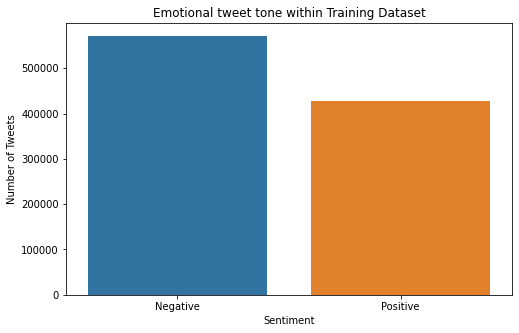

In [23]:
f, axes = plt.subplots(figsize=(8, 5))
ax = sns.countplot(x="target", data=Train_Dataset)
ax.set(xticklabels=['Negative','Positive'])
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Tweets')
ax.set_title('Emotional tweet tone within Training Dataset')
del ax,f,axes

In [24]:
positive_sentiment = Train_Dataset[Train_Dataset.target == 4]
positive_text=positive_sentiment['text']
print('The Train Dataset contains :',positive_sentiment.shape[0],' positive tweets')
negative_sentiment = Train_Dataset[Train_Dataset.target == 0]
negative_text=negative_sentiment['text']
print('The Train Dataset contains :',negative_sentiment.shape[0],' negative tweets')

The Train Dataset contains : 428593  positive tweets
The Train Dataset contains : 571315  negative tweets


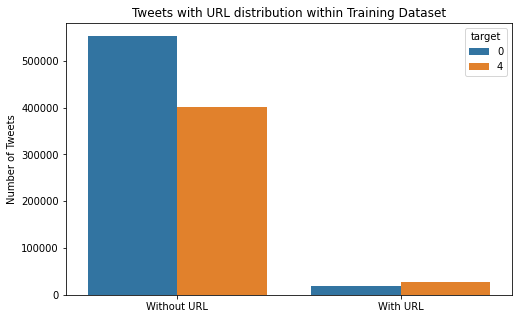

In [25]:
f, axes = plt.subplots(figsize=(8, 5))
ax = sns.countplot(x="flag_url", hue="target", data=Train_Dataset)
ax.set(xticklabels=['Without URL','With URL'])
ax.set_xlabel('')
ax.set_ylabel('Number of Tweets')
ax.set_title('Tweets with URL distribution within Training Dataset')
del ax,f,axes

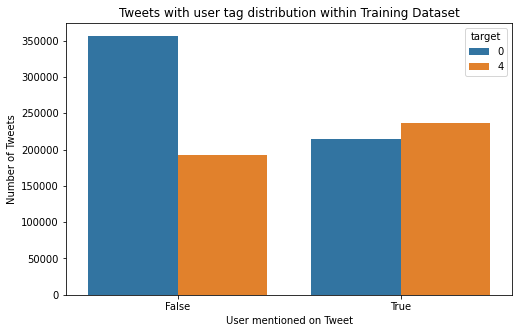

In [26]:
f, axes = plt.subplots(figsize=(8, 5))
ax = sns.countplot(x="flag_user", hue="target", data=Train_Dataset)
ax.set(xticklabels=['False','True'])
ax.set_xlabel('User mentioned on Tweet')
ax.set_ylabel('Number of Tweets')
ax.set_title('Tweets with user tag distribution within Training Dataset')
del ax,f,axes

<u>The function below is responsible for creating flags(two features) which is an indicator of emoticons (happy and sad) in the tweet.</u>

In [0]:
def faces(tweet):#For removing emoticons
    happy_flag =0
    sad_flag = 0
    happy = re.compile(r"([xX;:]-?[dDpP)])")
    initial = len(tweet)
    text = happy.sub(r'',tweet)
    result = ''.join([i for i in text if not i.isdigit()]) 
    final = len(result)
    number = 0
    for i in text:
      if i.isdigit():
        number+=1
    if( final != initial - number):
      happy_flag=1
    sad = re.compile(r"([:]'?[/\|(])")
    initial = len(result)
    text = sad.sub(r'',result)
    result1 = ''.join([i for i in text if not i.isdigit()]) 
    final = len(result1)
    number = 0
    for i in text:
      if i.isdigit():
        number+=1
    if( final != initial - number):
      sad_flag=1  
    return pd.Series([result1,happy_flag,sad_flag])

In [0]:
Train_Dataset[['text','flag_happy', 'flag_sad']] = Train_Dataset.apply(lambda x: faces(x.text),axis=1)
Test_Dataset[['text','flag_happy', 'flag_sad']] = Test_Dataset.apply(lambda x: faces(x.text),axis=1)

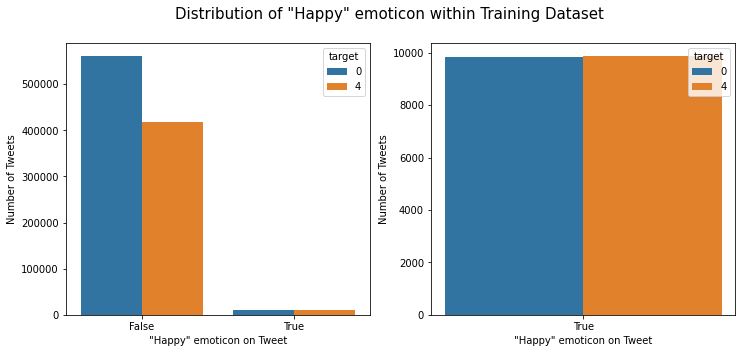

In [29]:
f, axes = plt.subplots(1,2,figsize=(12, 5))
ax = sns.countplot(x="flag_happy", hue="target", data=Train_Dataset,ax=axes[0])
ax.set(xticklabels=['False','True'])
ax.set_xlabel('"Happy" emoticon on Tweet')
ax.set_ylabel('Number of Tweets')
ax = sns.countplot(x="flag_happy", hue="target", data=Train_Dataset[Train_Dataset.flag_happy==1],ax=axes[1])
ax.set(xticklabels=['True'])
ax.set_xlabel('"Happy" emoticon on Tweet')
ax.set_ylabel('Number of Tweets')
f.suptitle('Distribution of "Happy" emoticon within Training Dataset',fontsize=15)
del ax,f,axes

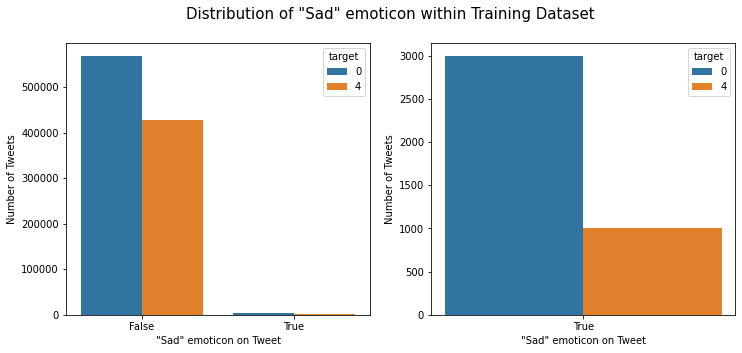

In [30]:
f, axes = plt.subplots(1,2,figsize=(12, 5))
ax = sns.countplot(x="flag_sad", hue="target", data=Train_Dataset,ax=axes[0])
ax.set(xticklabels=['False','True'])
ax.set_xlabel('"Sad" emoticon on Tweet')
ax.set_ylabel('Number of Tweets')
ax = sns.countplot(x="flag_sad", hue="target", data=Train_Dataset[Train_Dataset.flag_sad==1],ax=axes[1])
ax.set(xticklabels=['True'])
ax.set_xlabel('"Sad" emoticon on Tweet')
ax.set_ylabel('Number of Tweets')
f.suptitle('Distribution of "Sad" emoticon within Training Dataset',fontsize=15)
del ax,f,axes

In [31]:
print('tweets with sad emoticon: ',Train_Dataset.flag_sad.value_counts()[1])
print('tweets with happy emoticon: ',Train_Dataset.flag_happy.value_counts()[1])

tweets with sad emoticon:  4004
tweets with happy emoticon:  19699


In [32]:
Train_Dataset.head(3)

,target,date,user,text,flag_url,flag_user,flag_happy,flag_sad
id,,,,,,,,
2224496154,0,Thu Jun 18 09:34:25 PDT 2009,Deborah_Fay,Okay for some reason I still can't get the ba...,0,0,1,0
1687934301,4,Sun May 03 09:56:56 PDT 2009,haills,- Don't worry be happy! Well that all depends...,1,0,0,0
1972073814,0,Sat May 30 08:30:21 PDT 2009,lechellealice,this movie is so sad,0,0,0,0


### Tweet/Text Preprocessing
*Stopwords removal has to be done before stemming. Stop word removal involves the removal of uninformative words that do not add meaning to a sentence. While stemming reduces words to its stem(word before adding inflectional affixes).*

In [0]:
def stop_word_tweet(tweet):
    tknzr = TweetTokenizer(preserve_case=False,strip_handles=True, reduce_len=True)
    myStemmer = PorterStemmer()
    tweet = tknzr.tokenize(tweet)
    aux = []
    for i in tweet:
      if "'ve" in i:
        aux.append(i[:-3])
        aux.append('have')
      else:
        aux.append(i)
    tweet = aux
    stop = stopwords.words('english')
    new_list = [myStemmer.stem(word) for word in tweet if word not in stop]
    tweet = ' '.join(new_list)
    return tweet

In [0]:
Train_Dataset['text'] =Train_Dataset['text'].apply(stop_word_tweet)
Test_Dataset['text'] =Test_Dataset['text'].apply(stop_word_tweet)

#### <u>*Remove Punctuation*</u>

In [0]:
def remove_punctuations(text):#For removing punctuation
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
Train_Dataset['text'] =Train_Dataset['text'].apply(remove_punctuations)
Test_Dataset['text'] =Test_Dataset['text'].apply(remove_punctuations)


In [36]:
Train_Dataset.head(3)

,target,date,user,text,flag_url,flag_user,flag_happy,flag_sad
id,,,,,,,,
2224496154,0,Thu Jun 18 09:34:25 PDT 2009,Deborah_Fay,okay reason still cant get background pictur e...,0,0,1,0
1687934301,4,Sun May 03 09:56:56 PDT 2009,haills,worri happi well depend situat,1,0,0,0
1972073814,0,Sat May 30 08:30:21 PDT 2009,lechellealice,movi sad,0,0,0,0


#### <u>*Feature creation (Datetime decomposition)*</u>

In [0]:
def decode_date(string_test):
  aux = string_test.replace(' PDT','')
  date_utc = datetime.strptime(aux, '%a %b %d %H:%M:%S %Y')
  return pd.Series([date_utc.weekday(), date_utc.day, date_utc.month, date_utc.year, date_utc.hour])
Train_Dataset[['day_week','day', 'month','year','hour']] = Train_Dataset['date'].apply(decode_date)
Test_Dataset[['day_week','day', 'month','year','hour']] = Test_Dataset['date'].apply(decode_date)

In [38]:
Train_Dataset.head(3)

,target,date,user,text,flag_url,flag_user,flag_happy,flag_sad,day_week,day,month,year,hour
id,,,,,,,,,,,,,
2224496154,0,Thu Jun 18 09:34:25 PDT 2009,Deborah_Fay,okay reason still cant get background pictur e...,0,0,1,0,3,18,6,2009,9
1687934301,4,Sun May 03 09:56:56 PDT 2009,haills,worri happi well depend situat,1,0,0,0,6,3,5,2009,9
1972073814,0,Sat May 30 08:30:21 PDT 2009,lechellealice,movi sad,0,0,0,0,5,30,5,2009,8


In [39]:
Train_Dataset.describe()

,target,flag_url,flag_user,flag_happy,flag_sad,day_week,day,month,year,hour
count,999908.000000,999908.000000,999908.000000,999908.000000,999908.000000,999908.000000,999908.000000,999908.000000,999908.0,999908.000000
mean,1.714530,0.044344,0.451102,0.019701,0.004004,3.341210,15.417374,5.445084,2009.0,10.931510
std,1.979523,0.205859,0.497603,0.138970,0.063153,2.184903,10.197332,0.624671,0.0,7.261936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2009.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,5.000000,2009.0,5.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,17.000000,6.000000,2009.0,10.000000
75%,4.000000,0.000000,1.000000,0.000000,0.000000,5.000000,22.000000,6.000000,2009.0,18.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,6.000000,31.000000,6.000000,2009.0,23.000000


*Since the dataset contains tweets within three months in 2009. we decided to remove these features from the dataset.*

In [0]:
Train_Dataset.drop(['month','year','date'],axis=1,inplace=True)
Test_Dataset.drop(['month','year','date'],axis=1,inplace=True)

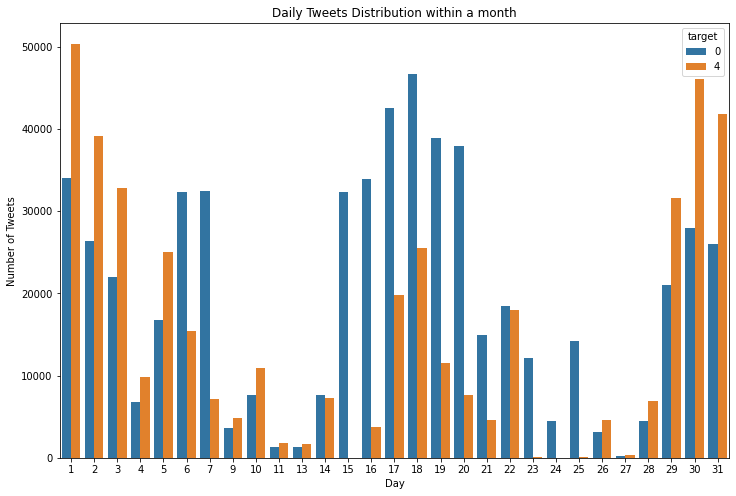

In [41]:
fig, axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="day", hue="target", data=Train_Dataset)
ax.set_xlabel('Day')
ax.set_ylabel('Number of Tweets')
ax.set_title('Daily Tweets Distribution within a month')
del ax,fig,axes

<u>*The plot shows that there are positive tweets at the beginning and the end of the month, while negative tweets are in the middle of the month.*</u>

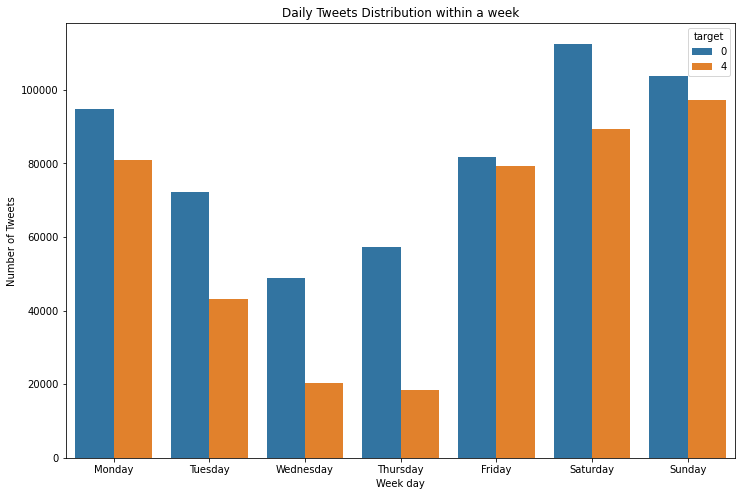

In [42]:
fig, axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="day_week", hue="target", data=Train_Dataset)
ax.set_xlabel('Week day')
ax.set(xticklabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_ylabel('Number of Tweets')
ax.set_title('Daily Tweets Distribution within a week')
del ax,fig,axes

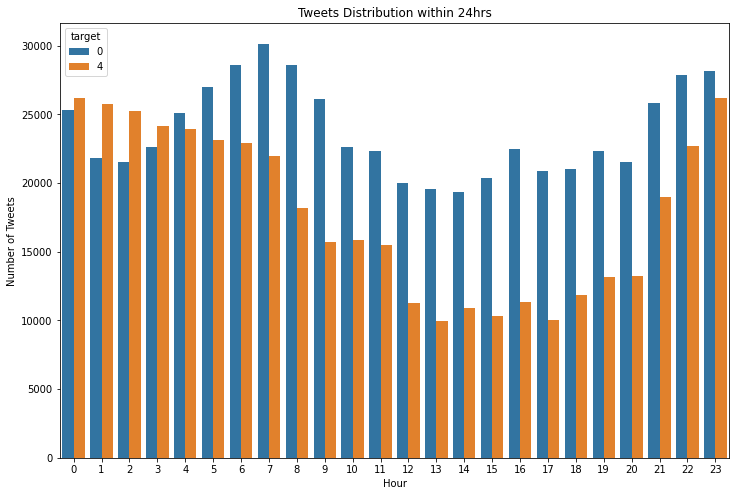

In [43]:
fig, axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="hour", hue="target", data=Train_Dataset)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Tweets')
ax.set_title('Tweets Distribution within 24hrs')
del ax,fig,axes

<u>*The plot shows that there is a decrease in tweets during working hours, and these tweets are negative*</u>.

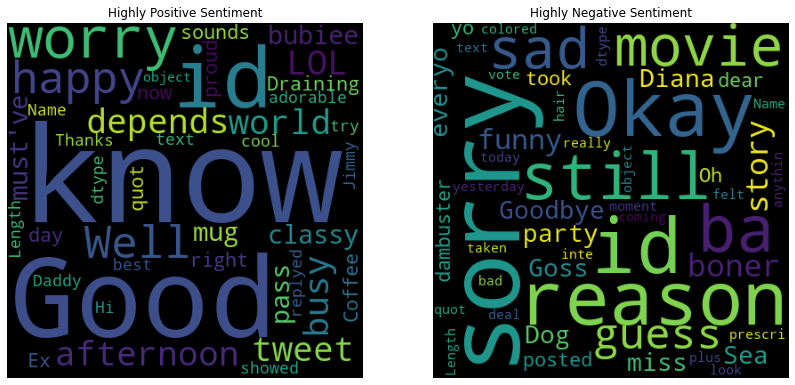

CPU times: user 879 ms, sys: 27 ms, total: 906 ms
Wall time: 917 ms


In [44]:
%%time
# Create and generate a word 
fig, ax = plt.subplots(1, 2, figsize=(14,14),edgecolor = 'k')
positive_tweet = WordCloud(width = 400,height = 400,background_color = 'black',stopwords = STOPWORDS).generate(str(positive_text))
negative_tweet = WordCloud(width = 400,height = 400,background_color = 'black',stopwords = STOPWORDS).generate(str(negative_text))
ax[0].imshow(positive_tweet)
ax[0].axis('off')
ax[0].set_title('Highly Positive Sentiment')
ax[1].imshow(negative_tweet)
ax[1].axis('off')
ax[1].set_title('Highly Negative Sentiment')
plt.show()

### Word embedding
TF-IDF(Term Frequency-Inverse Document Frequency): Encodes a measure relative to how many times a word appears in a document relative to the overall number of words in the matrix. The purpose of using this function is to filter words and assign numeric values to them, so the IDF factor is not essential.

In [45]:
tfidf_vectorizer=TfidfVectorizer(min_df=5,max_df=0.98,use_idf=False)
tfidf_vectorizer.fit(Train_Dataset['text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.98, max_features=None,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=False, vocabulary=None)

In [0]:
## changing the 0 value to len of dictionary in order to be able to use padding
for key, value in tfidf_vectorizer.vocabulary_.items(): 
  if 0 ==value: 
    tfidf_vectorizer.vocabulary_[key] = len(tfidf_vectorizer.vocabulary_)

# ***Implementation***
---

## Model Baseline
*Before thinking about creating complex Deep Learning Model, we must establish a baseline. Usually, this baseline is based on the performance of a simple Model or a simple solution which allows us to compare the performance of more complex solutions. The baseline we chose is a Linear Support Vector Classifier along with GridSearch for hyper-parameter tuning.* 

In [0]:
X = tfidf_vectorizer.transform(Train_Dataset['text'])

In [0]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

params={'C':[0.01,0.1,0.5,1.0,10.0]}
clf = LinearSVC(loss='hinge',random_state=0, tol=1e-5)
cross_val = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(clf, param_grid = params,refit=True,verbose=1,n_jobs=-1, cv = cross_val)

In [49]:
grid_search.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='hinge', max_iter=1000, multi_class='ovr',
                                 penalty='l2', random_state=0, tol=1e-05,
                                 verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [50]:
print("Best parameters: %s" % grid_search.best_params_)
print("Baseline accuracy Score: %s" % grid_search.best_score_)

Best parameters: {'C': 1.0}
Baseline accuracy Score: 0.7786856404257165


## Data Preprocessing (vectorize and train-test split)

In [0]:
def create_vector(text):
  tknzr = TweetTokenizer()
  tweet = tknzr.tokenize(text)
  aux = [int(tfidf_vectorizer.vocabulary_[k]) for k in tweet if k in tfidf_vectorizer.vocabulary_.keys()]
  return aux

In [0]:
Train_Dataset['text'] = Train_Dataset.text.apply(create_vector)
Test_Dataset['text'] = Test_Dataset.text.apply(create_vector)

Text(0.5, 1.0, 'Tweet lenght distribution')

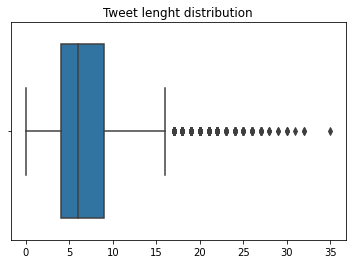

In [53]:
result = [len(x) for x in Train_Dataset.text] 
ax = sns.boxplot(result)
ax.set_title('Tweet lenght distribution')

In [0]:
max_len=37 ## choosen because the longest tweet is 35 words

<u>*Padding the words in the tweet with '0' in order to have all tweets with same lenght (necessary for embedding)*</u>

In [55]:
aux=Train_Dataset.text.to_list()
padded_docs = pad_sequences(aux, maxlen=max_len, padding='post')
padded_docs

array([[18624, 21434, 24974, ...,     0,     0,     0],
       [29634, 11474, 29007, ...,     0,     0,     0],
       [17262, 22507,     0, ...,     0,     0,     0],
       ...,
       [ 4088, 28560, 17023, ...,     0,     0,     0],
       [ 5274, 11327, 15380, ...,     0,     0,     0],
       [26210,  5608,     0, ...,     0,     0,     0]], dtype=int32)

### Splitting train val and test
*The dataset is splitted into Train, validation and test dataset. The validation set is use to compute early stopping on when fitting the model using the train set. After the model is trained, it is evaluated using the test dataset.*

In [0]:
X_train1, X_test, y_train1, y_test = train_test_split(padded_docs, Y, test_size=0.05, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.05, random_state=0)
vocab_size = len(tfidf_vectorizer.vocabulary_) + 1
del padded_docs,X_train1,y_train1

## Model 1
*The first model implemented is a recurrent neural network (Long short-term memory LSTM) added to an embedding layer (in order to embed all tweets).*The cost function is a binary_crossentropy, this is because as the baseline performed better than expected with only two classes, we could expect that the test data contains only those classes(0 and 4). We have selected  the 'adam' optimizer because it is the recommended one for processing word embedding*

In [57]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(vocab_size, 200, input_length=max_len))
model.add(keras.layers.LSTM(400))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1,activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 37, 200)           6101200   
_________________________________________________________________
lstm (LSTM)                  (None, 400)               961600    
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 401       
Total params: 7,063,201
Trainable params: 7,063,201
Non-trainable params: 0
_________________

In [58]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=2,factor=0.5,min_lr=0.001)
early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('model',save_best_only=True)
history = model.fit(X_train , y_train,batch_size=1024, epochs=300,validation_data=(X_val, y_val),callbacks=[check_point,early_stop,learning_rate_reduction],verbose=1)

Train on 902416 samples, validate on 47496 samples
Epoch 1/300
902416/902416 [==============================] - 262s 291us/sample - loss: 0.5815 - acc: 0.6748 - val_loss: 0.4624 - val_acc: 0.7803
Epoch 2/300
902416/902416 [==============================] - 260s 288us/sample - loss: 0.4447 - acc: 0.7910 - val_loss: 0.4465 - val_acc: 0.7878
Epoch 3/300
902416/902416 [==============================] - 260s 288us/sample - loss: 0.4193 - acc: 0.8052 - val_loss: 0.4510 - val_acc: 0.7896
Epoch 4/300
902416/902416 [==============================] - 260s 289us/sample - loss: 0.3972 - acc: 0.8172 - val_loss: 0.4601 - val_acc: 0.7871
Epoch 5/300
902416/902416 [==============================] - 261s 289us/sample - loss: 0.3731 - acc: 0.8294 - val_loss: 0.4673 - val_acc: 0.7866


Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accuracy :0.79%Model accurac

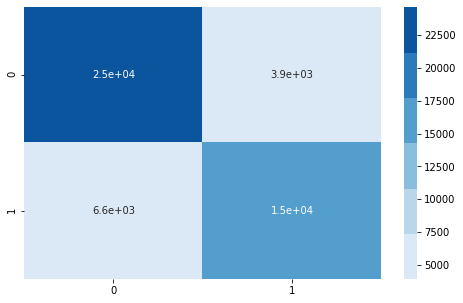

In [59]:
test_pred = model.predict_classes(X_test)
conf= sklearn.metrics.confusion_matrix(y_test,test_pred)
conf=pd.DataFrame(conf,index=range(0,2),columns=range(0,2))
plt.figure(figsize=(8,5))
color = sns.color_palette("Blues")
sns.heatmap(conf, annot=True,cmap=color)
Error = model.evaluate(X_test, y_test, verbose=0)
print('Model accuracy :%.2f%%' % Error[1]*100)

## Scores from some of the models created
<u> Recurrent Neural Network model (LSTM)</u>
*   Embedding layer (vector size: 50)
*   LSTM layer (200)
*   Dropout(0.5)
*   Output = Sigmoid
*   Loss = binary crossentropy
*   Optimizer = adam(default parametres)
*   Batch size = 1024
*   Epchos = 100
*   Early_stop patience = 3
*   learning_rate_reduction factor:0.5
```
# Validation Error: 21.33%
# Test Error: 21.59%
```
---
*   Embedding layer (vector size: 50)
*   Dropout (0.5)
*   LSTM layer (200)
*   Dropout(0.5)
*   Dense (200, relu)
*   Dropout (0.5)
*   Output = Sigmoid
*   Loss = binary crossentropy
*   Optimizer = adam(default parametres)
*   Batch size = 1024
*   Epchos = 100
*   Early_stop patience = 3
```
# Validation Error:  21.18%
# Test Error: 21.33%
```
---
<u> Convolution model</u>
*   Embedding layer (vector size: 50)
*   Convolution1D layer (filters: 16 windows: 3 activation: relu)
*   MaxPool1D layer (windows: 2)
*   Convolution1D layer (filters: 32 windows: 3 activation: relu)
*   MaxPool1D layer (windows: 2)
*   Flatten layer
*   Dense layer (neuron:100 activation: relu)
*   Dropout (0.5)
*   Output = Sigmoid
*   Loss = binary crossentropy
*   Optimizer = adam(default parametres)
*   Batch size = 1024
*   Epchos = 100
*   Early_stop patience = 3
```
# Validation Error:  21.42%
# Test Error: 21.49%
```
---
<u> Convolution model (2 Inputs:tweet and flags)</u>
*   Embedding layer (vector size: 50)
*   Convolution1D layer (filters: 16 windows: 3 activation: relu)
*   MaxPool1D layer (windows: 2)
*   Flatten layer
*   Concatenate (flag input + out flatten layer)
*   Dense layer (neuron:150 activation: relu)
*   Dropout (0.2)
*   Dense layer (neuron:150 activation: relu)
*   Dropout (0.2)
*   Output = Sigmoid
*   Loss = binary crossentropy
*   Optimizer = adam(default parametres)
*   Batch size = 1024
*   Epchos = 100
*   Early_stop patience = 3
```
# Validation Error:  14.79%
# Test Error: 15.07%
```
---
<u> Bidirectional LSTM (2 Inputs:tweet and flags)</u>
*   Embedding layer (vector size: 50)
*   Bidirectional LSTM layer(64)
*   GlobalMaxPool1D layer
*   Dense layer (neuron:100 activation: relu)
*   Dropout (0.2)
*   Concatenate (flag input + out Dropout layer)
*   Dense layer (neuron:150 activation: relu)
*   Dropout (0.2)
*   Dense layer (neuron:150 activation: relu)
*   Dropout (0.2)
*   Output = Sigmoid
*   Loss = binary crossentropy
*   Optimizer = adam(default parametres)
*   Batch size = 1024
*   Epchos = 100
*   Early_stop patience = 3
```
# Validation Error:  14.71%
# Test Error: 15.00%
```
---


# Final Model

---



---


The final model consists of a Fully Connected Neural Network with two inputs:
*   <u>Tweet Flags + Date decomposition:</u> this input includes all the flags generated which indicate for example if the tweet contains a URL or an emoticon. Furthermore, it contains the date decomposition of the tweet (the relevant information about the date such us the time, the day and the week-day)
*   <u>Embedded Tweet:</u> This input consists of the embedded tweet over the Embedding layer + LSTM layer.
Both inputs go through a dense layer (neuron:100, activator: relu) and a dropout layer (regularizer) before getting into the output layer (activator: sigmoid).
The metric used, as mentioned before, are Adam as the model optimizer and binary_crossentropy as the loss function.


## Data Preprocessing (vectorize and train-test split)
*The dataset is split into Train, validation and test dataset. The validation set is used to compute early stopping when fitting the model using the train set. After the model is trained, it is evaluated using the test dataset.*

*Later, the tweets (converted to a vector of int) undergoes input padding, which cuts the sequences to a specific length and filling the voids with zero values*

In [0]:
Train_Dataset_notarget = Train_Dataset.copy()
Train_Dataset_notarget.drop(['target','user'],inplace=True,axis=1)

In [0]:
X_train1, X_test, y_train1, y_test = train_test_split(Train_Dataset_notarget.values, Y, test_size=0.05, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.05, random_state=0)

In [0]:
def split_inputs(array):
  dataset = pd.DataFrame(array,columns=Train_Dataset_notarget.columns.values)
  aux = dataset['text'].values.tolist()
  padded = pad_sequences(aux, maxlen=max_len, padding='post')
  return [padded , np.asarray(dataset.drop(['text'],axis=1).values,dtype=int)]
X_test1,X_test2 = split_inputs(X_test)
X_val1,X_val2 = split_inputs(X_val)
X_train1,X_train2 = split_inputs(X_train)
del X_val,X_test,X_train

In [63]:
np.random.seed(0)
input_dense = keras.layers.Input(shape=[7])
input_embedding = keras.layers.Input(shape=max_len)
embedding = keras.layers.Embedding(vocab_size, 100, input_length=max_len)(input_embedding)
lstm = keras.layers.LSTM(200)(embedding)
concat = keras.layers.Concatenate()([lstm,input_dense])
Dense1 = keras.layers.Dense(150,activation='relu')(concat)
Dropout =keras.layers.Dropout(0.2)(Dense1)
Dense2 = keras.layers.Dense(150,activation='relu')(Dropout)
Dropout2 =keras.layers.Dropout(0.2)(Dense2)
Output = keras.layers.Dense(1,activation='sigmoid')(Dropout2)
model5 = keras.Model(inputs=[input_embedding, input_dense], outputs=[Output])
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model5.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 37)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 37, 100)      3050600     input_2[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 200)          240800      embedding_1[0][0]                
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 7)]          0                                            
______________________________________________________________________________________________

In [64]:

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            factor=0.5, 
                                            min_lr=0.001)
early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('model',save_best_only=True)
history = model5.fit([X_train1, X_train2] , y_train,batch_size=512, epochs=300,validation_data=([X_val1, X_val2], y_val), callbacks=[check_point,early_stop,learning_rate_reduction],verbose=1)

Train on 902416 samples, validate on 47496 samples
Epoch 1/300
902416/902416 [==============================] - 177s 197us/sample - loss: 0.5350 - acc: 0.7060 - val_loss: 0.4532 - val_acc: 0.7645
Epoch 2/300
902416/902416 [==============================] - 178s 198us/sample - loss: 0.4536 - acc: 0.7618 - val_loss: 0.4033 - val_acc: 0.8063
Epoch 3/300
902416/902416 [==============================] - 177s 196us/sample - loss: 0.3877 - acc: 0.8177 - val_loss: 0.3351 - val_acc: 0.8455
Epoch 4/300
902416/902416 [==============================] - 176s 195us/sample - loss: 0.3266 - acc: 0.8506 - val_loss: 0.3202 - val_acc: 0.8507
Epoch 5/300
902416/902416 [==============================] - 176s 195us/sample - loss: 0.3077 - acc: 0.8598 - val_loss: 0.3181 - val_acc: 0.8516
Epoch 6/300
902416/902416 [==============================] - 177s 197us/sample - loss: 0.2944 - acc: 0.8664 - val_loss: 0.3203 - val_acc: 0.8511
Epoch 7/300
902416/902416 [==============================] - 177s 196us/sample 

In [65]:
Error = model5.evaluate([X_test1, X_test2] , y_test, verbose=0)
print("model5 Test Error: %.2f%%" % (100-Error[1]*100))

model5 Test Error: 15.02%


Text(0.5, 1.0, 'Confusion matrix')

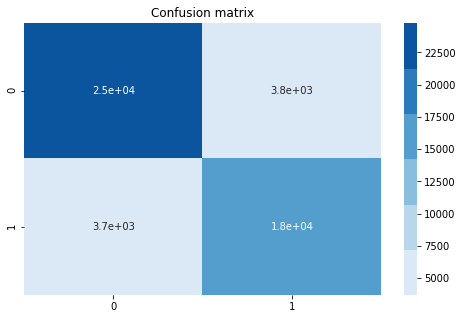

In [66]:
y_pred = model5.predict([X_test1,X_test2])
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1
conf= sklearn.metrics.confusion_matrix(y_test,y_pred)
conf=pd.DataFrame(conf,index=range(0,2),columns=range(0,2))
plt.figure(figsize=(8,5))
color = sns.color_palette("Blues")
a1= sns.heatmap(conf, annot=True,cmap=color)
a1.set_title('Confusion matrix')

# Predictions


---




In [0]:
Test_Dataset.drop(['user'],inplace=True,axis=1)

In [0]:
X_test1_pred,X_test2_pred = split_inputs(Test_Dataset.values)
y_pred = model5.predict([X_test1_pred,X_test2_pred])
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1
y_pred = [int(x) for x in y_pred]
y_pred = encoder.inverse_transform(y_pred)

In [69]:
y_pred[0:10]

array([0, 4, 0, 0, 0, 0, 0, 0, 0, 4])

In [0]:
ID = pd.read_csv("/content/test.csv",na_values=['NA'])
pred_file = pd.DataFrame({"id":ID['id'], "target":y_pred})
pred_file=pred_file.set_index('id')
pred_file.to_csv('/content/FinalModelPred.csv')

In [0]:
files.download('/content/FinalModelPred.csv')

# Reflections and Conclusion

---
Simple ANN configurations such as embedding or convolution1D show good performance when performing our sentiment analysis (up to 78%).However, this score is very close to the baseline model (77%), so we opted for a sequential model with multiple-input. 
Our final model consists of two inputs; the first input refers to the tweet text (it goes through the embedding layers and the RNN layer), while the second input refers to both the flags generated during the pre-processing of the data and the tweet publish date. These flags indicate the existence of links in the tweets, users tags. Emoticons such as ":)" and ":( ", indicates positive and negative emotions, respectively. The date includes only relevant information regarding when the tweets were published, which also correlates with the class of the tweet(negative or positive). The model has a final score of 85.5% (in both train_validation/train_test and Kaggle score).